--- Dataset details ---
* step: represents a unit of time where 1 step equals 1 hour
* type: type of online transaction
* amount: the amount of the transaction
* nameOrig: customer starting the transaction
* oldbalanceOrg: balance before the transaction
* newbalanceOrig: balance after the transaction
* nameDest: recipient of the transaction
* oldbalanceDest: initial balance of recipient before the transaction
* newbalanceDest: the new balance of recipient after the transaction
* isFraud: fraud transaction

Dataset link---https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('Fraud Detection.csv')

In [3]:
df.shape

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### EDA

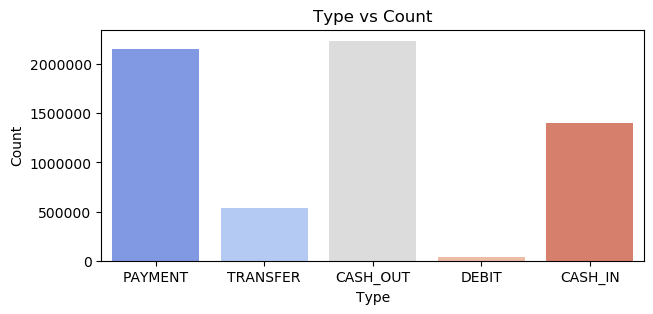

In [8]:
## Countplot of 'Type'
plt.figure(figsize=(7,3))
sns.countplot(x = df.type, palette='coolwarm')
plt.title('Type vs Count')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

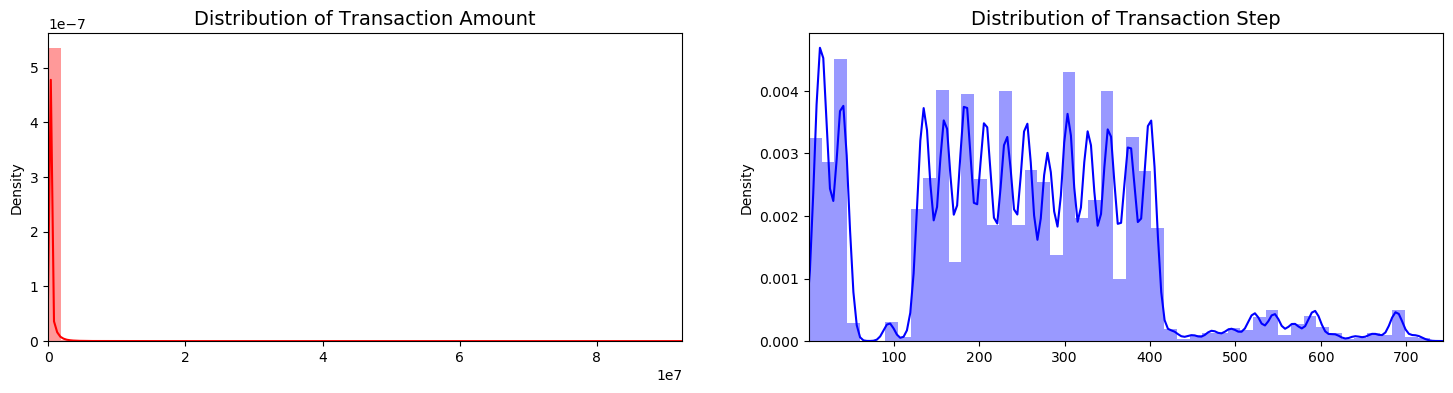

In [9]:
## Plotting subplot for amount and time column
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = df['amount'].values
time_val = df['step'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Step', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

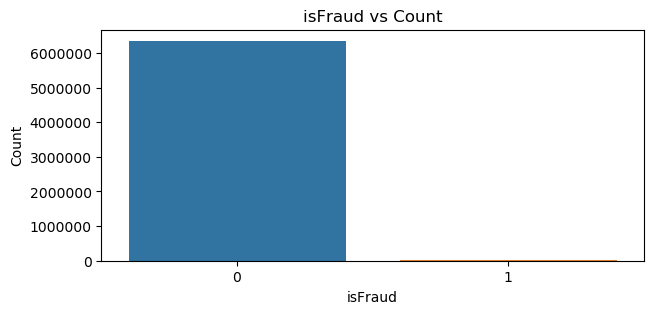

In [10]:
# Countplot of 'isFraud'
plt.figure(figsize=(7,3))
plt.title('isFraud vs Count')
sns.countplot(x=df.isFraud)
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

We can see this is an imbalanced dataset.

In [11]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [12]:
# Let's look at the percentage of each category in isFraud column(target column)
print("No Frauds:",df['isFraud'].value_counts()[0]/len(df['isFraud'])*100)
print("Frauds:",df['isFraud'].value_counts()[1]/len(df['isFraud'])*100)

No Frauds: 99.87091795518198
Frauds: 0.12908204481801522


In [13]:
numerical_cols = df.select_dtypes(exclude='object').columns
categorical_cols = df.select_dtypes(include='object').columns

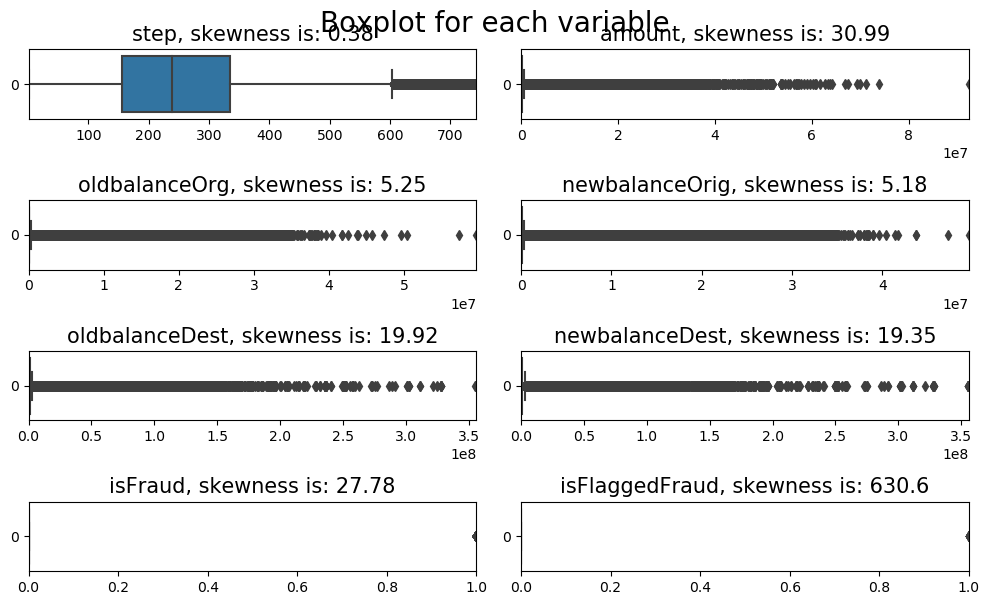

In [21]:
## Boxplot for each variable in numerical list:

def boxplot(data, column):
    fig, ax = plt.subplots(4, 2, figsize = (10, 6))
    fig.suptitle('Boxplot for each variable', y=1, size = 20)
    ax = ax.flatten()

    for i, feature in enumerate(column):
        sns.boxplot(data=data[feature], ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis=0, skipna = True), 2)), fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
        plt.tight_layout()  

boxplot(data = df, column=numerical_cols)
plt.tight_layout()

In [22]:
# Checking nameOrig,nameDest column
print("Unique in nameOrig:", df.nameOrig.nunique())
print("Unique in nameDest:", df.nameDest.nunique())

Unique in nameOrig: 6353307
Unique in nameDest: 2722362


In [23]:
# Checking isFlaggedFraud column
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [24]:
# Dropping columns that are not needed
df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [25]:
df=pd.get_dummies(data=df,columns=['type'],drop_first=True)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [26]:
## We are using RobustScaler to scale down the numerical features as RobustScaler is less prone to outliers

from sklearn.preprocessing import RobustScaler

scale=RobustScaler()
for feature in numerical_cols:
    if feature == 'isFlaggedFraud':
        continue
    else:
        df[feature]=scale.fit_transform(df[feature].values.reshape(-1, 1))
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.329609,-0.332932,1.452991,1.111175,-0.140722,-0.193057,0.0,0,0,1,0
1,-1.329609,-0.373762,0.065610,0.134375,-0.140722,-0.193057,0.0,0,0,1,0
2,-1.329609,-0.382380,-0.130708,0.000000,-0.140722,-0.193057,1.0,0,0,0,1
3,-1.329609,-0.382380,-0.130708,0.000000,-0.118260,-0.193057,1.0,1,0,0,0
4,-1.329609,-0.323571,0.254820,0.207169,-0.140722,-0.193057,0.0,0,0,1,0


### Model Training

In [27]:
# Splitting our data into independent and dependent features
x=df.drop('isFraud',axis=1)
y=df['isFraud']

In [28]:
x.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')

In [29]:
df[df['isFraud']==1]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,-1.329609,-0.382380,-0.130708,0.0,-0.140722,-0.193057,1.0,0,0,0,1
3,-1.329609,-0.382380,-0.130708,0.0,-0.118260,-0.193057,1.0,1,0,0,0
251,-1.329609,-0.368941,-0.106248,0.0,-0.140722,-0.193057,1.0,0,0,0,1
252,-1.329609,-0.368941,-0.106248,0.0,-0.112937,-0.193057,1.0,1,0,0,0
680,-1.329609,-0.280261,0.055165,0.0,-0.140722,-0.193057,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6362615,2.815642,1.355693,3.032881,0.0,-0.140722,0.112438,1.0,1,0,0,0
6362616,2.815642,31.927899,58.679504,0.0,-0.140722,-0.193057,1.0,0,0,0,1
6362617,2.815642,31.927899,58.679504,0.0,-0.068096,5.544730,1.0,1,0,0,0
6362618,2.815642,3.968274,7.788223,0.0,-0.140722,-0.193057,1.0,0,0,0,1


In [30]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.14021678 0.24893212 0.27371311 0.07842631 0.05365579 0.18601627
 0.01241262 0.         0.         0.00662701]


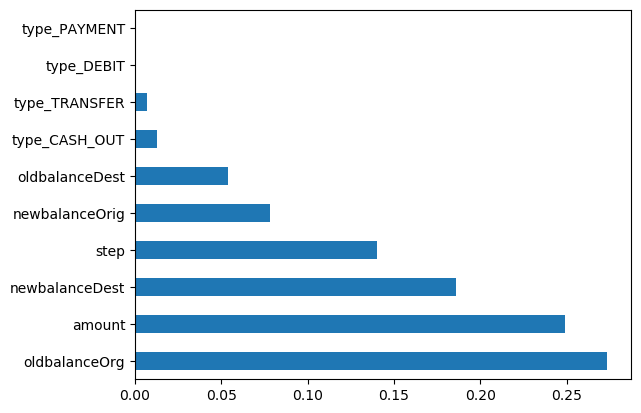

In [31]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [32]:
# Doing train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [33]:
## Applying Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(confusion_matrix(y_test,dt_pred))
print(accuracy_score(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

[[1906113     243]
 [    320    2110]]
0.999705048130068
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1906356
         1.0       0.90      0.87      0.88      2430

    accuracy                           1.00   1908786
   macro avg       0.95      0.93      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



In [34]:
## Applying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
print(confusion_matrix(y_test,forest_pred))
print(accuracy_score(y_test,forest_pred))
print(classification_report(y_test,forest_pred))

[[1906317      39]
 [    536    1894]]
0.9996987614117036
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1906356
         1.0       0.98      0.78      0.87      2430

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



In [35]:
## Applying StratifiedKFold
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=3, shuffle=False, random_state=None)

In [36]:
## Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

model1=LogisticRegression()
param={'C':10.0 **np.arange(-1,2)}
lrs=RandomizedSearchCV(model1,param,cv=skf,n_jobs=-1,scoring='accuracy')
lrs.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([ 0.1,  1. , 10. ])},
                   scoring='accuracy')

In [37]:
y_pred=lrs.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1906241     115]
 [   1230    1200]]
0.9992953636499848
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1906356
         1.0       0.91      0.49      0.64      2430

    accuracy                           1.00   1908786
   macro avg       0.96      0.75      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786

